In [162]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# import dataset
dataset=pd.read_csv('Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [99]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [100]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

C:\Users\sagri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


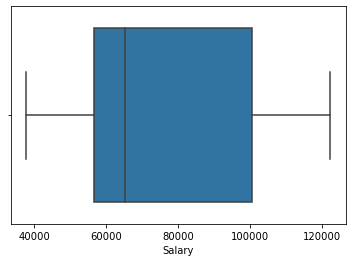

In [101]:
#checking whether outliers are present in YrExp column
sns.boxplot(dataset['Salary'])
plt.show()

C:\Users\sagri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


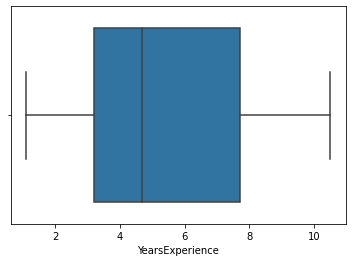

In [102]:
sns.boxplot(dataset['YearsExperience'])
plt.show()

In [60]:
# so there are no outliers in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\sagri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

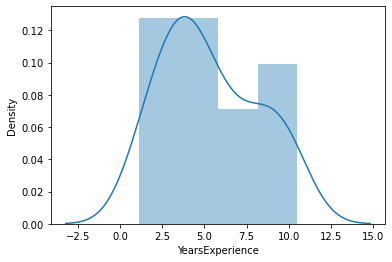

In [103]:
#EDA and Data Visualization
dataset.info()

sns.distplot(dataset['YearsExperience'])

C:\Users\sagri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

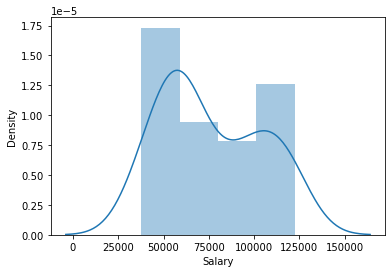

In [104]:
sns.distplot(dataset['Salary'])

In [105]:
#Correlation Analysis
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


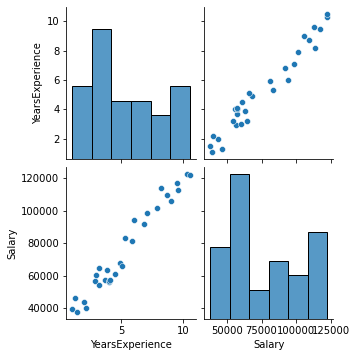

In [106]:
sns.pairplot(dataset)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

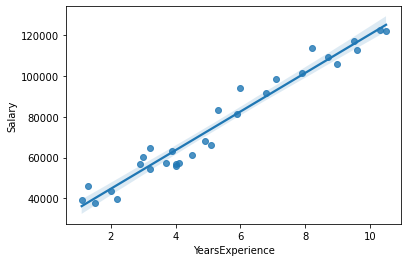

In [107]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

In [108]:
#Model Building
model=smf.ols("Salary~YearsExperience",data=dataset).fit()

#Model Testing
# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [109]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [110]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [111]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.14e-20
Time:                        15:16:08   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
pred = model.predict(dataset['YearsExperience'])
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [164]:
#checking the rmse value of the model
rmse = np.sqrt(np.mean((np.array(dataset['Salary'])-np.array(data_pred))**2))
rmse 

80637.13328072455

In [118]:
# doing logarithmic tranformation for better model
model1 = smf.ols("Salary~np.log(YearsExperience)",data = dataset).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           3.25e-13
Time:                        15:16:30   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
pred2 = model1.predict(dataset['YearsExperience'])
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [122]:
#checking the rmse value again of the model
rmse1 = np.sqrt(np.mean((np.array(dataset['Salary'])-np.array(pred2))**2))
rmse1

10302.893706228308

In [170]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


# import dataset
dataset=pd.read_csv('delivery_time.csv')
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [124]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [125]:
dataset.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

C:\Users\sagri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery Time'>

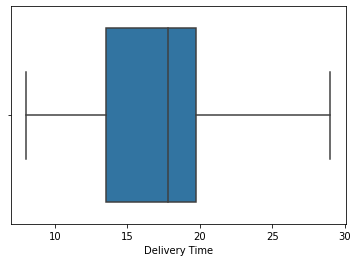

In [127]:
sns.boxplot(dataset['Delivery Time'])

C:\Users\sagri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sorting Time'>

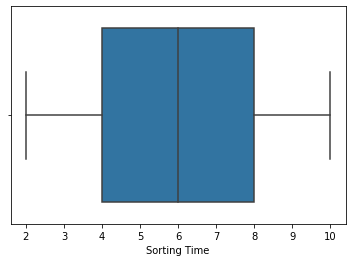

In [129]:
sns.boxplot(dataset['Sorting Time'])

In [130]:
#EDA and Data Visualization
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\sagri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

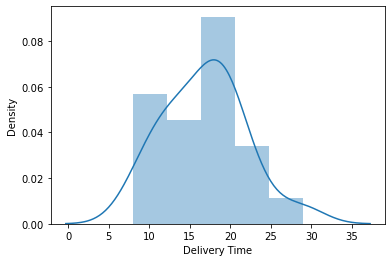

In [131]:
sns.distplot(dataset['Delivery Time'])

C:\Users\sagri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

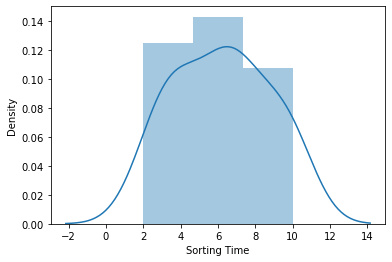

In [132]:
sns.distplot(dataset['Sorting Time'])

In [171]:
#Feature Engineering
# Renaming Columns
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [172]:
#Correlation Analysis
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


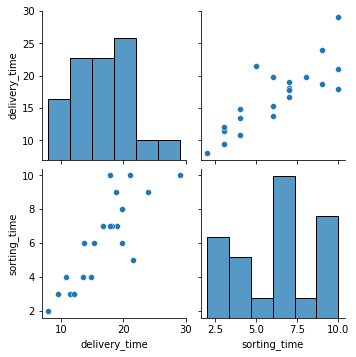

In [173]:
sns.pairplot(dataset)

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

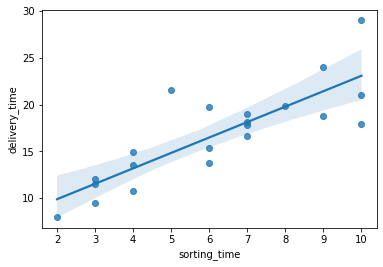

In [174]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

In [137]:
#Model Building
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

#Model Testing
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [138]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [139]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [140]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           3.98e-06
Time:                        15:22:17   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
pred = model.predict(dataset['sorting_time'])
pred

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [191]:
#checking the rmse value of the model
rmse = np.sqrt(np.mean((np.array(dataset['sorting_time'])-np.array(pred))**2))
rmse 

10.749542066249484

In [192]:
# doing logarithmic tranformation for better model
model1 = smf.ols('delivery_time~np.log(sorting_time)', data = dataset).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           2.64e-06
Time:                        16:06:29   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
pred2 = model1.predict(dataset['sorting_time'])
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [194]:
#checking the rmse value again of the model
rmse1 = np.sqrt(np.mean((np.array(dataset['sorting_time'])-np.array(pred2))**2))
rmse1 

10.749542066249484

In [196]:
# doing expnonential
model2 = smf.ols('delivery_time~np.exp(sorting_time)', data = dataset).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Tue, 01 Mar 2022   Prob (F-statistic):            0.00396
Time:                        16:07:51   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(sorting_time)     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [198]:
pred3 = model2.predict(dataset['sorting_time'])
pred3

0     23.739082
1     15.105033
2     15.242109
3     18.267760
4     23.739082
5     15.242109
6     15.514510
7     15.091471
8     23.739082
9     18.267760
10    16.254973
11    15.105033
12    15.514510
13    15.091471
14    15.091471
15    15.105033
16    15.242109
17    15.514510
18    15.086482
19    15.514510
20    15.141898
dtype: float64

In [199]:
#checking the rmse value again of the model
rmse2 = np.sqrt(np.mean((np.array(dataset['sorting_time'])-np.array(pred3))**2))
rmse2 

10.768433018008702

In [200]:
# doing square root transformation
model3= smf.ols('delivery_time~np.sqrt(sorting_time)', data = dataset).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           2.61e-06
Time:                        16:08:55   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(sorting_time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
pred4 = model3.predict(dataset['sorting_time'])
pred4

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
dtype: float64

In [204]:
#checking the rmse value again of the model
rmse3 = np.sqrt(np.mean((np.array(dataset['sorting_time'])-np.array(pred4))**2))
rmse3 

10.733248040710812

In [205]:
# so we got the high rsquare value and less rmse value as compare to other models